In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
# Basic Libraries
import seaborn as sns
import pandas as pd
# Custom Libraries
from rainfall.io import load_training_data, load_test_data, save_best_model_submission
from rainfall.feat_eng import add_features, calculate_feature_importance
from rainfall.pipeline import model_selector

from rainfall.constants import MODELS, PARAM_GRIDS, RESULT_DIR

IndentationError: unexpected indent (feat_eng.py, line 335)

In [19]:
train_data_path = '/Users/rakurai/Documents/Github/kg-rainfall-2025/data/train.csv'
extra_train_path = '/Users/rakurai/Documents/Github/kg-rainfall-2025/data/rainfall.csv'
test_data_path = '/Users/rakurai/Documents/Github/kg-rainfall-2025/data/test.csv'

In [20]:
X, y = load_training_data(train_data_path)
Xx,yx = load_training_data(extra_train_path)
X_test, test_ids = load_test_data(test_data_path)

In [3]:
#Xx dtype to the same as X
Xx = Xx.astype(X.dtypes.to_dict())

#combine training and extra training data
Xn = pd.concat([X, Xx], axis=0)
yn = pd.concat([y, yx], axis=0)

NameError: name 'Xx' is not defined

In [ ]:
_, _ = calculate_feature_importance(Xn, yn, X_test) 

Number of features in X_aug:  52


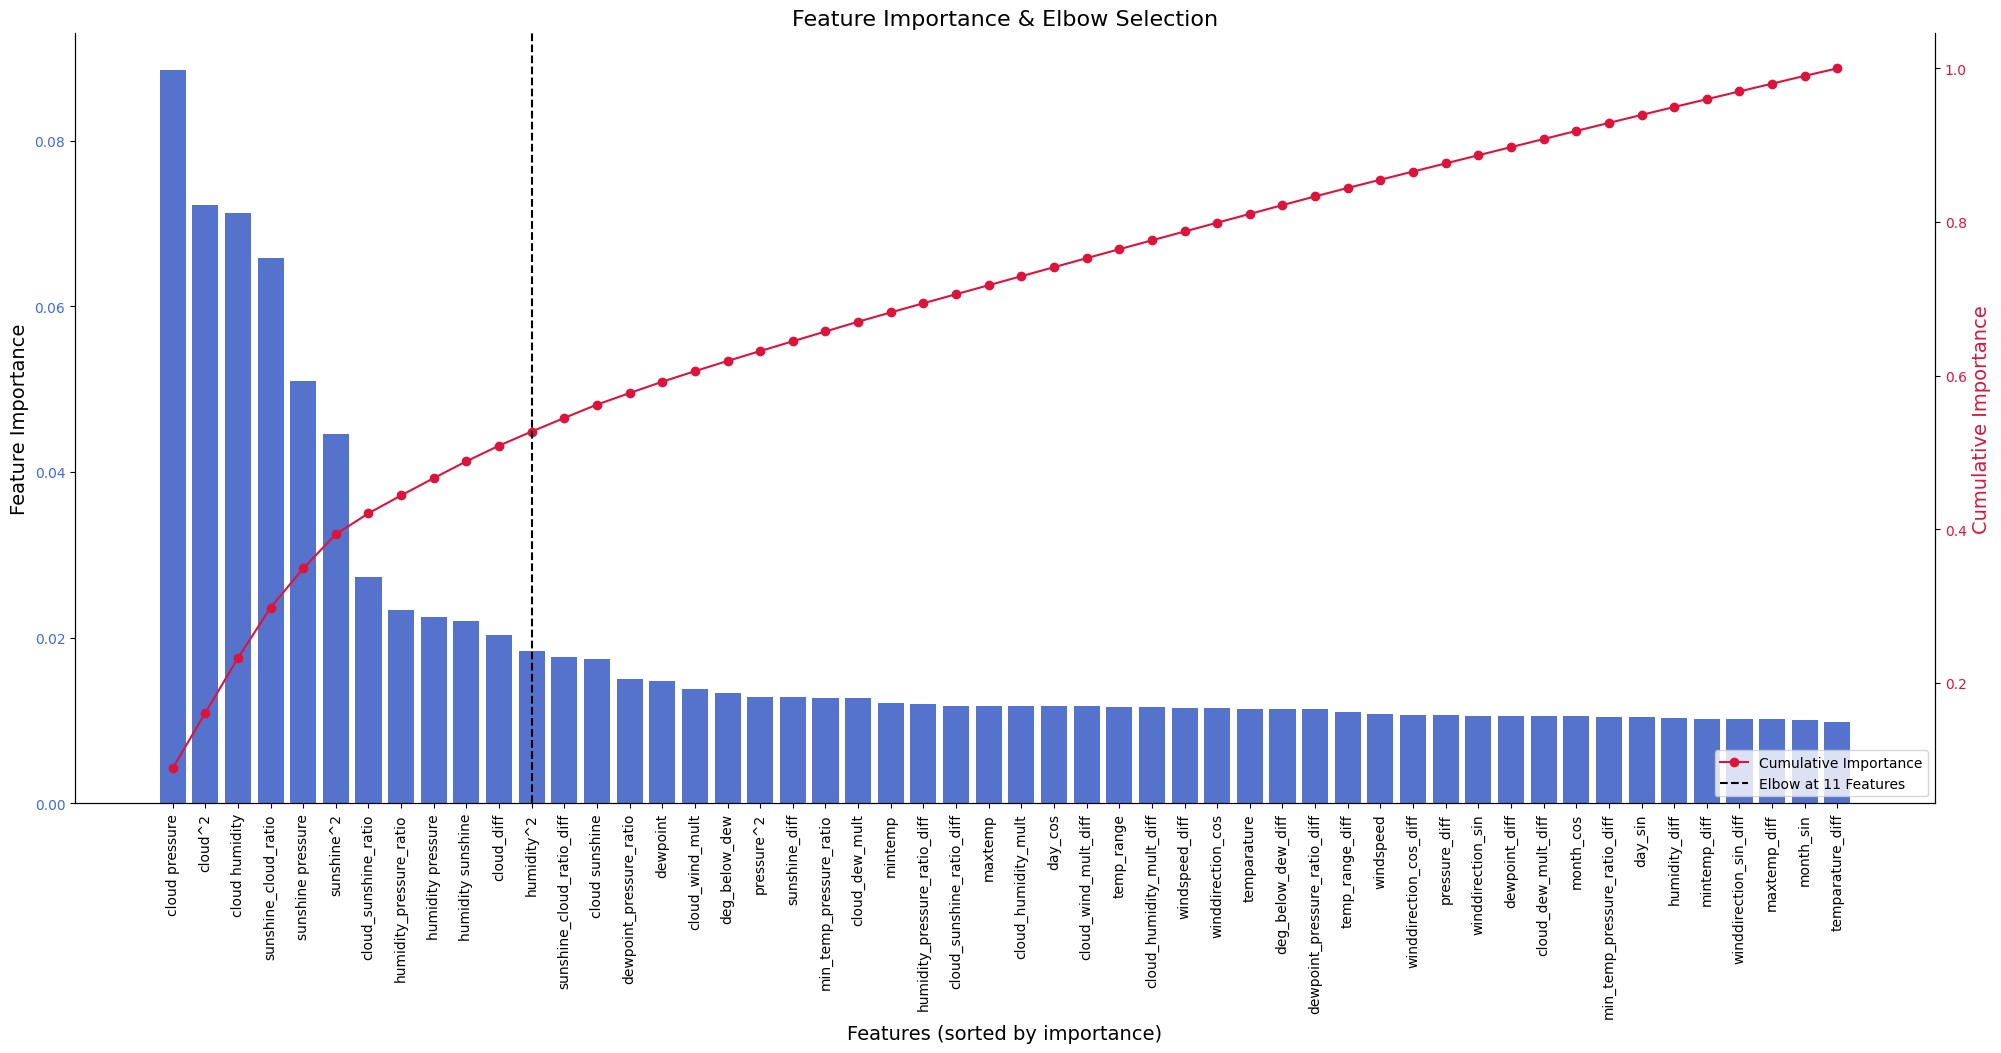

In [ ]:
X_aug = add_features(Xn)
X_test_aug = add_features(X_test)
print("Number of features in X_aug: ", X_aug.shape[1])
X_sort, X_test_sort = calculate_feature_importance(X_aug, yn, X_test_aug)
prinnt("Number of selected features in X_sort: ", X_sort.shape[1])

In [25]:
# sns.pairplot(X_sort, diag_kind='kde')


Training LogisticRegression on Extended IQR-treated & Standard Scaled features:
Best CV ROC AUC for LogisticRegression: 0.8912
Best Params: {'clf__solver': 'liblinear', 'clf__penalty': 'l1', 'clf__max_iter': 100, 'clf__C': 7.742636826811277}

Training DecisionTree on Extended IQR-treated & Standard Scaled features:
Best CV ROC AUC for DecisionTree: 0.8745
Best Params: {'clf__min_samples_split': 2, 'clf__min_samples_leaf': 1, 'clf__max_depth': 3, 'clf__criterion': 'entropy'}

Training ExtraTrees on Extended IQR-treated & Standard Scaled features:
Best CV ROC AUC for ExtraTrees: 0.8855
Best Params: {'clf__n_estimators': 150, 'clf__min_samples_split': 2, 'clf__min_samples_leaf': 1, 'clf__max_features': 'sqrt', 'clf__max_depth': 7}

Training RandomForest on Extended IQR-treated & Standard Scaled features:
Best CV ROC AUC for RandomForest: 0.8862
Best Params: {'clf__n_estimators': 150, 'clf__min_samples_split': 2, 'clf__min_samples_leaf': 2, 'clf__max_features': 'log2', 'clf__max_depth': 5

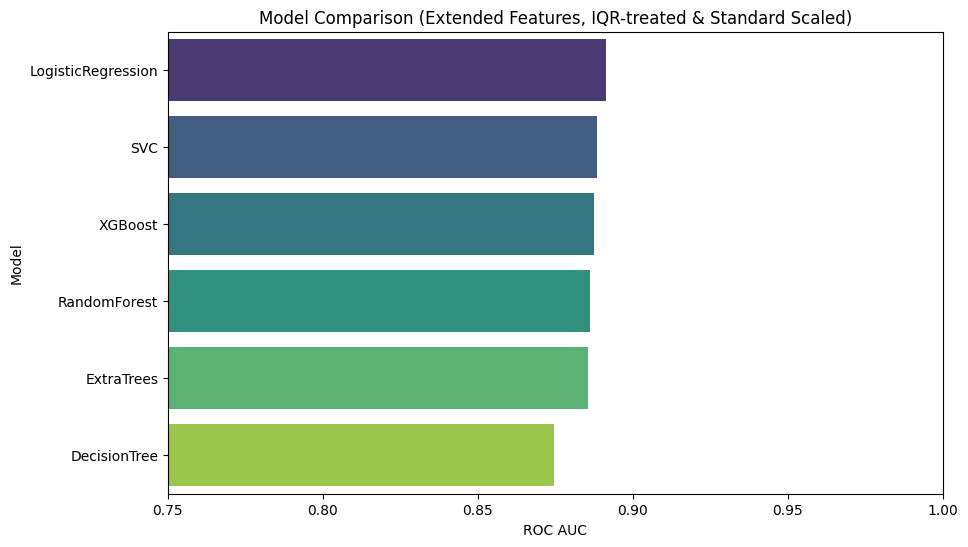

In [26]:
results = model_selector(MODELS, PARAM_GRIDS, X_sort, yn, X_test_sort, test_ids, RESULT_DIR)

In [27]:
results

{'LogisticRegression': 0.8912284803113713,
 'DecisionTree': 0.8745206136150738,
 'ExtraTrees': 0.8854926375821744,
 'RandomForest': 0.8862350420044406,
 'XGBoost': 0.8874020744445785,
 'SVC': 0.8884020036766553}

In [28]:

save_best_model_submission(results)

Best scoring model: LogisticRegression: 0.8912
Copied results/LogisticRegression_submission.csv as 'submission.csv'

 All individual model submissions saved:
- results/LogisticRegression_submission.csv
- results/DecisionTree_submission.csv
- results/ExtraTrees_submission.csv
- results/RandomForest_submission.csv
- results/XGBoost_submission.csv
- results/CatBoost_submission.csv
- results/LGBM_submission.csv
- results/KNN_submission.csv
- results/SVC_submission.csv
